In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import randint
from sklearn.dummy import DummyRegressor

In [10]:
data = load_diabetes(as_frame=True)
df = pd.concat([data.data, data.target.rename('target')], axis=1)

In [20]:
X = df.drop(columns='target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [21]:
models = {
    'LinearRegression': LinearRegression(),
    'DummyRegressor_mean': DummyRegressor(strategy='mean'),
}

In [22]:
summary = []
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = y_pred
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    summary.append({
        "Model": name,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2
    })

In [23]:
print("\n" + "="*70)
print("📊 VERTEILUNG DER ZIELVARIABLE")
print("="*70)
print(f"Minimum:             {y_test.min():.1f}")
print(f"Maximum:             {y_test.max():.1f}")
print(f"Mittelwert:          {y_test.mean():.1f}")
print(f"Standardabweichung:  {y_test.std():.1f}")
print(f"Median:              {np.median(y_test):.1f}")


📊 VERTEILUNG DER ZIELVARIABLE
Minimum:             37.0
Maximum:             310.0
Mittelwert:          148.0
Standardabweichung:  73.8
Median:              132.0


In [24]:
df_summary = pd.DataFrame(summary)

print("\n" + "="*80)
print("                        📊 MODELLVERGLEICH ERGEBNISSE")
print("="*80)

df_display = df_summary.copy()
numeric_columns = ['MSE', 'RMSE', 'MAE', 'R2']
df_display[numeric_columns] = df_display[numeric_columns].round(4)

print(df_display.to_string(index=False, 
                          float_format='%.4f',
                          col_space=12,
                          justify='center'))

print("="*80)


                        📊 MODELLVERGLEICH ERGEBNISSE
       Model             MSE         RMSE          MAE          R2     
   LinearRegression  2821.7510     53.1202      41.9194       0.4773   
DummyRegressor_mean  5432.8864     73.7081      64.2643      -0.0064   


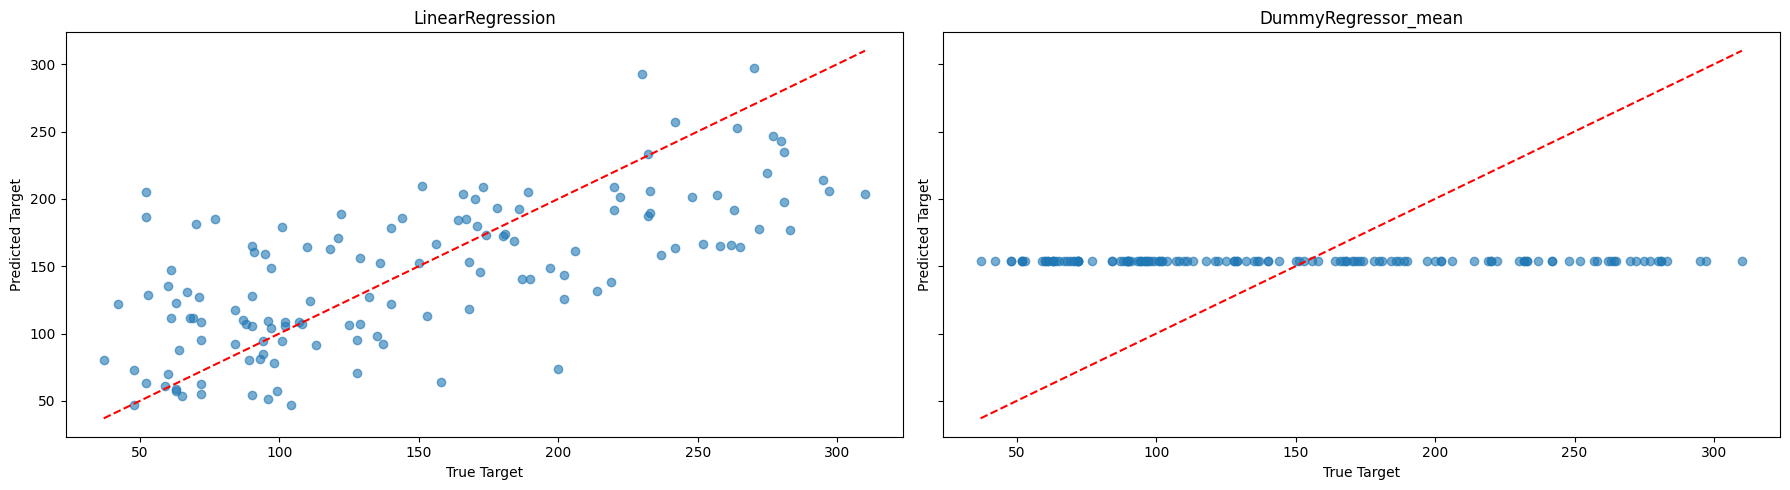

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5), sharex=True, sharey=True)
for ax, (name, y_pred) in zip(axes, predictions.items()):
    ax.scatter(y_test, y_pred, alpha=0.6)
    mn, mx = y_test.min(), y_test.max()
    ax.plot([mn, mx], [mn, mx], 'r--')
    
    ax.set_title(name)
    ax.set_xlabel('True Target')
    ax.set_ylabel('Predicted Target')

plt.tight_layout()
plt.show()